In [2]:
#
# Project 1, source code for part A question 1
#

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [3]:
# scale data (set range min and max of 0 and 1 respectively)
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

NUM_CLASSES = 3
NUM_FEATURES = 21

epochs = 1000
batch_size = 32
num_neurons = 10
seed = 10
decay_beta = 0.000001
learning_rate = 0.01
hidden_layer = 10

np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
trainX, train_Y = train_input[1:, :21], train_input[1:,-1].astype(int)
print("trainX max: "+str(np.max(trainX))+", trainX min: "+str(np.min(trainX)))
trainX = scale(trainX, np.min(trainX, axis=0), np.max(trainX, axis=0))
print("After scaling:")
print("trainX max: "+str(np.max(trainX))+", trainX min: "+str(np.min(trainX)))

trainY = np.zeros((train_Y.shape[0], NUM_CLASSES))
trainY[np.arange(train_Y.shape[0]), train_Y-1] = 1 

trainX max: 269.0, trainX min: -1.0
After scaling:
trainX max: 1.0, trainX min: 0.0


In [5]:
print("TrainX: ")
print(trainX.shape)
print("TrainY: ")
print(trainY.shape)

TrainX: 
(2126, 21)
TrainY: 
(2126, 3)


In [6]:
#Split train and test data

train_X, test_X, train_Y, test_Y = train_test_split(trainX, trainY, test_size=0.3)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(1488, 21)
(638, 21)
(1488, 3)
(638, 3)


In [7]:
# Generate model
model = keras.Sequential([
    keras.layers.Dense(hidden_layer, use_bias = True, input_shape = (NUM_FEATURES,), activation='relu', 
                       kernel_regularizer = tf.keras.regularizers.l2(decay_beta)),
    keras.layers.Dense(NUM_CLASSES, use_bias=True, activation='softmax')
])

GD_opt = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=GD_opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train model
history = model.fit(train_X, train_Y,
                      epochs=epochs,
                      verbose = 2,
                      batch_size=batch_size,
                      validation_data = (test_X, test_Y),
                      shuffle=True)

Epoch 1/1000
47/47 - 0s - loss: 0.8583 - accuracy: 0.6862 - val_loss: 0.7368 - val_accuracy: 0.7790
Epoch 2/1000
47/47 - 0s - loss: 0.7163 - accuracy: 0.7782 - val_loss: 0.6879 - val_accuracy: 0.7790
Epoch 3/1000
47/47 - 0s - loss: 0.6895 - accuracy: 0.7782 - val_loss: 0.6752 - val_accuracy: 0.7790
Epoch 4/1000
47/47 - 0s - loss: 0.6791 - accuracy: 0.7782 - val_loss: 0.6669 - val_accuracy: 0.7790
Epoch 5/1000
47/47 - 0s - loss: 0.6711 - accuracy: 0.7782 - val_loss: 0.6596 - val_accuracy: 0.7790
Epoch 6/1000
47/47 - 0s - loss: 0.6636 - accuracy: 0.7782 - val_loss: 0.6523 - val_accuracy: 0.7790
Epoch 7/1000
47/47 - 0s - loss: 0.6564 - accuracy: 0.7782 - val_loss: 0.6450 - val_accuracy: 0.7790
Epoch 8/1000
47/47 - 0s - loss: 0.6493 - accuracy: 0.7782 - val_loss: 0.6380 - val_accuracy: 0.7790
Epoch 9/1000
47/47 - 0s - loss: 0.6423 - accuracy: 0.7782 - val_loss: 0.6311 - val_accuracy: 0.7790
Epoch 10/1000
47/47 - 0s - loss: 0.6356 - accuracy: 0.7782 - val_loss: 0.6245 - val_accuracy: 0.7790

Epoch 83/1000
47/47 - 0s - loss: 0.3451 - accuracy: 0.8602 - val_loss: 0.3346 - val_accuracy: 0.8746
Epoch 84/1000
47/47 - 0s - loss: 0.3433 - accuracy: 0.8616 - val_loss: 0.3330 - val_accuracy: 0.8777
Epoch 85/1000
47/47 - 0s - loss: 0.3416 - accuracy: 0.8629 - val_loss: 0.3316 - val_accuracy: 0.8840
Epoch 86/1000
47/47 - 0s - loss: 0.3402 - accuracy: 0.8629 - val_loss: 0.3299 - val_accuracy: 0.8809
Epoch 87/1000
47/47 - 0s - loss: 0.3388 - accuracy: 0.8656 - val_loss: 0.3286 - val_accuracy: 0.8824
Epoch 88/1000
47/47 - 0s - loss: 0.3373 - accuracy: 0.8629 - val_loss: 0.3273 - val_accuracy: 0.8824
Epoch 89/1000
47/47 - 0s - loss: 0.3357 - accuracy: 0.8649 - val_loss: 0.3260 - val_accuracy: 0.8840
Epoch 90/1000
47/47 - 0s - loss: 0.3344 - accuracy: 0.8642 - val_loss: 0.3250 - val_accuracy: 0.8887
Epoch 91/1000
47/47 - 0s - loss: 0.3334 - accuracy: 0.8663 - val_loss: 0.3232 - val_accuracy: 0.8840
Epoch 92/1000
47/47 - 0s - loss: 0.3319 - accuracy: 0.8642 - val_loss: 0.3220 - val_accurac

Epoch 164/1000
47/47 - 0s - loss: 0.2762 - accuracy: 0.8858 - val_loss: 0.2734 - val_accuracy: 0.8981
Epoch 165/1000
47/47 - 0s - loss: 0.2758 - accuracy: 0.8858 - val_loss: 0.2734 - val_accuracy: 0.8966
Epoch 166/1000
47/47 - 0s - loss: 0.2755 - accuracy: 0.8858 - val_loss: 0.2726 - val_accuracy: 0.8966
Epoch 167/1000
47/47 - 0s - loss: 0.2750 - accuracy: 0.8844 - val_loss: 0.2725 - val_accuracy: 0.8981
Epoch 168/1000
47/47 - 0s - loss: 0.2744 - accuracy: 0.8871 - val_loss: 0.2729 - val_accuracy: 0.8981
Epoch 169/1000
47/47 - 0s - loss: 0.2742 - accuracy: 0.8851 - val_loss: 0.2720 - val_accuracy: 0.8966
Epoch 170/1000
47/47 - 0s - loss: 0.2738 - accuracy: 0.8884 - val_loss: 0.2716 - val_accuracy: 0.8981
Epoch 171/1000
47/47 - 0s - loss: 0.2736 - accuracy: 0.8884 - val_loss: 0.2714 - val_accuracy: 0.8966
Epoch 172/1000
47/47 - 0s - loss: 0.2729 - accuracy: 0.8864 - val_loss: 0.2708 - val_accuracy: 0.8966
Epoch 173/1000
47/47 - 0s - loss: 0.2728 - accuracy: 0.8858 - val_loss: 0.2706 - v

Epoch 245/1000
47/47 - 0s - loss: 0.2547 - accuracy: 0.8965 - val_loss: 0.2595 - val_accuracy: 0.8981
Epoch 246/1000
47/47 - 0s - loss: 0.2537 - accuracy: 0.8918 - val_loss: 0.2603 - val_accuracy: 0.8934
Epoch 247/1000
47/47 - 0s - loss: 0.2549 - accuracy: 0.8965 - val_loss: 0.2589 - val_accuracy: 0.9013
Epoch 248/1000
47/47 - 0s - loss: 0.2541 - accuracy: 0.8965 - val_loss: 0.2589 - val_accuracy: 0.9013
Epoch 249/1000
47/47 - 0s - loss: 0.2541 - accuracy: 0.8945 - val_loss: 0.2583 - val_accuracy: 0.8997
Epoch 250/1000
47/47 - 0s - loss: 0.2541 - accuracy: 0.8958 - val_loss: 0.2587 - val_accuracy: 0.8981
Epoch 251/1000
47/47 - 0s - loss: 0.2535 - accuracy: 0.8985 - val_loss: 0.2596 - val_accuracy: 0.8934
Epoch 252/1000
47/47 - 0s - loss: 0.2532 - accuracy: 0.8945 - val_loss: 0.2582 - val_accuracy: 0.9013
Epoch 253/1000
47/47 - 0s - loss: 0.2539 - accuracy: 0.8918 - val_loss: 0.2593 - val_accuracy: 0.8981
Epoch 254/1000
47/47 - 0s - loss: 0.2535 - accuracy: 0.8952 - val_loss: 0.2587 - v

Epoch 326/1000
47/47 - 0s - loss: 0.2445 - accuracy: 0.9019 - val_loss: 0.2539 - val_accuracy: 0.9028
Epoch 327/1000
47/47 - 0s - loss: 0.2447 - accuracy: 0.8972 - val_loss: 0.2538 - val_accuracy: 0.9028
Epoch 328/1000
47/47 - 0s - loss: 0.2443 - accuracy: 0.8952 - val_loss: 0.2545 - val_accuracy: 0.8997
Epoch 329/1000
47/47 - 0s - loss: 0.2449 - accuracy: 0.8999 - val_loss: 0.2536 - val_accuracy: 0.9013
Epoch 330/1000
47/47 - 0s - loss: 0.2444 - accuracy: 0.8985 - val_loss: 0.2540 - val_accuracy: 0.9013
Epoch 331/1000
47/47 - 0s - loss: 0.2442 - accuracy: 0.8965 - val_loss: 0.2541 - val_accuracy: 0.8997
Epoch 332/1000
47/47 - 0s - loss: 0.2443 - accuracy: 0.8965 - val_loss: 0.2529 - val_accuracy: 0.9028
Epoch 333/1000
47/47 - 0s - loss: 0.2438 - accuracy: 0.8992 - val_loss: 0.2548 - val_accuracy: 0.8981
Epoch 334/1000
47/47 - 0s - loss: 0.2445 - accuracy: 0.8985 - val_loss: 0.2527 - val_accuracy: 0.8997
Epoch 335/1000
47/47 - 0s - loss: 0.2442 - accuracy: 0.8965 - val_loss: 0.2534 - v

Epoch 407/1000
47/47 - 0s - loss: 0.2385 - accuracy: 0.8958 - val_loss: 0.2496 - val_accuracy: 0.9013
Epoch 408/1000
47/47 - 0s - loss: 0.2381 - accuracy: 0.8985 - val_loss: 0.2488 - val_accuracy: 0.9013
Epoch 409/1000
47/47 - 0s - loss: 0.2383 - accuracy: 0.8978 - val_loss: 0.2493 - val_accuracy: 0.9013
Epoch 410/1000
47/47 - 0s - loss: 0.2382 - accuracy: 0.8992 - val_loss: 0.2487 - val_accuracy: 0.9013
Epoch 411/1000
47/47 - 0s - loss: 0.2383 - accuracy: 0.8978 - val_loss: 0.2498 - val_accuracy: 0.9013
Epoch 412/1000
47/47 - 0s - loss: 0.2382 - accuracy: 0.8985 - val_loss: 0.2503 - val_accuracy: 0.9013
Epoch 413/1000
47/47 - 0s - loss: 0.2378 - accuracy: 0.8972 - val_loss: 0.2492 - val_accuracy: 0.9013
Epoch 414/1000
47/47 - 0s - loss: 0.2379 - accuracy: 0.8965 - val_loss: 0.2494 - val_accuracy: 0.9013
Epoch 415/1000
47/47 - 0s - loss: 0.2375 - accuracy: 0.8992 - val_loss: 0.2504 - val_accuracy: 0.9013
Epoch 416/1000
47/47 - 0s - loss: 0.2376 - accuracy: 0.8985 - val_loss: 0.2491 - v

Epoch 488/1000
47/47 - 0s - loss: 0.2342 - accuracy: 0.8992 - val_loss: 0.2471 - val_accuracy: 0.8997
Epoch 489/1000
47/47 - 0s - loss: 0.2334 - accuracy: 0.8972 - val_loss: 0.2466 - val_accuracy: 0.9013
Epoch 490/1000
47/47 - 0s - loss: 0.2339 - accuracy: 0.8972 - val_loss: 0.2463 - val_accuracy: 0.9013
Epoch 491/1000
47/47 - 0s - loss: 0.2334 - accuracy: 0.8965 - val_loss: 0.2464 - val_accuracy: 0.8997
Epoch 492/1000
47/47 - 0s - loss: 0.2337 - accuracy: 0.8965 - val_loss: 0.2466 - val_accuracy: 0.9013
Epoch 493/1000
47/47 - 0s - loss: 0.2335 - accuracy: 0.8985 - val_loss: 0.2479 - val_accuracy: 0.8997
Epoch 494/1000
47/47 - 0s - loss: 0.2337 - accuracy: 0.8985 - val_loss: 0.2476 - val_accuracy: 0.8997
Epoch 495/1000
47/47 - 0s - loss: 0.2333 - accuracy: 0.9005 - val_loss: 0.2459 - val_accuracy: 0.9013
Epoch 496/1000
47/47 - 0s - loss: 0.2335 - accuracy: 0.8965 - val_loss: 0.2461 - val_accuracy: 0.9028
Epoch 497/1000
47/47 - 0s - loss: 0.2337 - accuracy: 0.8958 - val_loss: 0.2456 - v

Epoch 569/1000
47/47 - 0s - loss: 0.2299 - accuracy: 0.8958 - val_loss: 0.2448 - val_accuracy: 0.9013
Epoch 570/1000
47/47 - 0s - loss: 0.2300 - accuracy: 0.8945 - val_loss: 0.2443 - val_accuracy: 0.9028
Epoch 571/1000
47/47 - 0s - loss: 0.2304 - accuracy: 0.8985 - val_loss: 0.2454 - val_accuracy: 0.8997
Epoch 572/1000
47/47 - 0s - loss: 0.2300 - accuracy: 0.9012 - val_loss: 0.2470 - val_accuracy: 0.8981
Epoch 573/1000
47/47 - 0s - loss: 0.2299 - accuracy: 0.9005 - val_loss: 0.2450 - val_accuracy: 0.9013
Epoch 574/1000
47/47 - 0s - loss: 0.2302 - accuracy: 0.8999 - val_loss: 0.2449 - val_accuracy: 0.9013
Epoch 575/1000
47/47 - 0s - loss: 0.2300 - accuracy: 0.8978 - val_loss: 0.2441 - val_accuracy: 0.9013
Epoch 576/1000
47/47 - 0s - loss: 0.2299 - accuracy: 0.8972 - val_loss: 0.2441 - val_accuracy: 0.9013
Epoch 577/1000
47/47 - 0s - loss: 0.2300 - accuracy: 0.8985 - val_loss: 0.2439 - val_accuracy: 0.9028
Epoch 578/1000
47/47 - 0s - loss: 0.2294 - accuracy: 0.8978 - val_loss: 0.2438 - v

Epoch 650/1000
47/47 - 0s - loss: 0.2278 - accuracy: 0.9005 - val_loss: 0.2440 - val_accuracy: 0.9060
Epoch 651/1000
47/47 - 0s - loss: 0.2272 - accuracy: 0.8999 - val_loss: 0.2426 - val_accuracy: 0.9060
Epoch 652/1000
47/47 - 0s - loss: 0.2264 - accuracy: 0.8992 - val_loss: 0.2425 - val_accuracy: 0.9044
Epoch 653/1000
47/47 - 0s - loss: 0.2266 - accuracy: 0.9012 - val_loss: 0.2456 - val_accuracy: 0.8981
Epoch 654/1000
47/47 - 0s - loss: 0.2267 - accuracy: 0.8978 - val_loss: 0.2438 - val_accuracy: 0.9044
Epoch 655/1000
47/47 - 0s - loss: 0.2264 - accuracy: 0.9026 - val_loss: 0.2430 - val_accuracy: 0.9044
Epoch 656/1000
47/47 - 0s - loss: 0.2270 - accuracy: 0.8992 - val_loss: 0.2447 - val_accuracy: 0.8981
Epoch 657/1000
47/47 - 0s - loss: 0.2256 - accuracy: 0.8992 - val_loss: 0.2419 - val_accuracy: 0.9044
Epoch 658/1000
47/47 - 0s - loss: 0.2264 - accuracy: 0.8999 - val_loss: 0.2423 - val_accuracy: 0.9028
Epoch 659/1000
47/47 - 0s - loss: 0.2259 - accuracy: 0.8985 - val_loss: 0.2461 - v

Epoch 731/1000
47/47 - 0s - loss: 0.2242 - accuracy: 0.8992 - val_loss: 0.2438 - val_accuracy: 0.9044
Epoch 732/1000
47/47 - 0s - loss: 0.2239 - accuracy: 0.9046 - val_loss: 0.2419 - val_accuracy: 0.9060
Epoch 733/1000
47/47 - 0s - loss: 0.2241 - accuracy: 0.9012 - val_loss: 0.2429 - val_accuracy: 0.9060
Epoch 734/1000
47/47 - 0s - loss: 0.2243 - accuracy: 0.8985 - val_loss: 0.2423 - val_accuracy: 0.9060
Epoch 735/1000
47/47 - 0s - loss: 0.2238 - accuracy: 0.9012 - val_loss: 0.2431 - val_accuracy: 0.9028
Epoch 736/1000
47/47 - 0s - loss: 0.2244 - accuracy: 0.8999 - val_loss: 0.2417 - val_accuracy: 0.9060
Epoch 737/1000
47/47 - 0s - loss: 0.2239 - accuracy: 0.9026 - val_loss: 0.2409 - val_accuracy: 0.9075
Epoch 738/1000
47/47 - 0s - loss: 0.2239 - accuracy: 0.8999 - val_loss: 0.2415 - val_accuracy: 0.9060
Epoch 739/1000
47/47 - 0s - loss: 0.2241 - accuracy: 0.9032 - val_loss: 0.2409 - val_accuracy: 0.9075
Epoch 740/1000
47/47 - 0s - loss: 0.2232 - accuracy: 0.9019 - val_loss: 0.2452 - v

Epoch 812/1000
47/47 - 0s - loss: 0.2214 - accuracy: 0.9032 - val_loss: 0.2399 - val_accuracy: 0.9091
Epoch 813/1000
47/47 - 0s - loss: 0.2221 - accuracy: 0.9012 - val_loss: 0.2407 - val_accuracy: 0.9075
Epoch 814/1000
47/47 - 0s - loss: 0.2224 - accuracy: 0.9005 - val_loss: 0.2410 - val_accuracy: 0.9075
Epoch 815/1000
47/47 - 0s - loss: 0.2212 - accuracy: 0.9032 - val_loss: 0.2409 - val_accuracy: 0.9075
Epoch 816/1000
47/47 - 0s - loss: 0.2213 - accuracy: 0.9039 - val_loss: 0.2425 - val_accuracy: 0.9060
Epoch 817/1000
47/47 - 0s - loss: 0.2217 - accuracy: 0.9026 - val_loss: 0.2429 - val_accuracy: 0.9013
Epoch 818/1000
47/47 - 0s - loss: 0.2217 - accuracy: 0.9046 - val_loss: 0.2430 - val_accuracy: 0.9060
Epoch 819/1000
47/47 - 0s - loss: 0.2212 - accuracy: 0.9046 - val_loss: 0.2424 - val_accuracy: 0.9060
Epoch 820/1000
47/47 - 0s - loss: 0.2212 - accuracy: 0.9012 - val_loss: 0.2427 - val_accuracy: 0.9044
Epoch 821/1000
47/47 - 0s - loss: 0.2217 - accuracy: 0.8999 - val_loss: 0.2421 - v

Epoch 893/1000
47/47 - 0s - loss: 0.2201 - accuracy: 0.9039 - val_loss: 0.2413 - val_accuracy: 0.9028
Epoch 894/1000
47/47 - 0s - loss: 0.2196 - accuracy: 0.9012 - val_loss: 0.2432 - val_accuracy: 0.9044
Epoch 895/1000
47/47 - 0s - loss: 0.2198 - accuracy: 0.9032 - val_loss: 0.2398 - val_accuracy: 0.9075
Epoch 896/1000
47/47 - 0s - loss: 0.2200 - accuracy: 0.9039 - val_loss: 0.2423 - val_accuracy: 0.9013
Epoch 897/1000
47/47 - 0s - loss: 0.2200 - accuracy: 0.9026 - val_loss: 0.2426 - val_accuracy: 0.9028
Epoch 898/1000
47/47 - 0s - loss: 0.2199 - accuracy: 0.9032 - val_loss: 0.2398 - val_accuracy: 0.9091
Epoch 899/1000
47/47 - 0s - loss: 0.2196 - accuracy: 0.9052 - val_loss: 0.2404 - val_accuracy: 0.9075
Epoch 900/1000
47/47 - 0s - loss: 0.2199 - accuracy: 0.9052 - val_loss: 0.2447 - val_accuracy: 0.8981
Epoch 901/1000
47/47 - 0s - loss: 0.2196 - accuracy: 0.8999 - val_loss: 0.2393 - val_accuracy: 0.9075
Epoch 902/1000
47/47 - 0s - loss: 0.2192 - accuracy: 0.8999 - val_loss: 0.2387 - v

Epoch 974/1000
47/47 - 0s - loss: 0.2157 - accuracy: 0.9039 - val_loss: 0.2373 - val_accuracy: 0.9075
Epoch 975/1000
47/47 - 0s - loss: 0.2160 - accuracy: 0.9052 - val_loss: 0.2377 - val_accuracy: 0.9075
Epoch 976/1000
47/47 - 0s - loss: 0.2152 - accuracy: 0.9026 - val_loss: 0.2377 - val_accuracy: 0.9044
Epoch 977/1000
47/47 - 0s - loss: 0.2158 - accuracy: 0.9039 - val_loss: 0.2392 - val_accuracy: 0.9044
Epoch 978/1000
47/47 - 0s - loss: 0.2145 - accuracy: 0.9066 - val_loss: 0.2369 - val_accuracy: 0.9060
Epoch 979/1000
47/47 - 0s - loss: 0.2155 - accuracy: 0.9019 - val_loss: 0.2389 - val_accuracy: 0.9075
Epoch 980/1000
47/47 - 0s - loss: 0.2156 - accuracy: 0.9026 - val_loss: 0.2391 - val_accuracy: 0.9060
Epoch 981/1000
47/47 - 0s - loss: 0.2151 - accuracy: 0.9039 - val_loss: 0.2393 - val_accuracy: 0.9013
Epoch 982/1000
47/47 - 0s - loss: 0.2153 - accuracy: 0.8999 - val_loss: 0.2379 - val_accuracy: 0.9044
Epoch 983/1000
47/47 - 0s - loss: 0.2155 - accuracy: 0.9019 - val_loss: 0.2378 - v

In [26]:
loss, accuracy = model.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 450us/step - loss: 0.2391 - accuracy: 0.9028


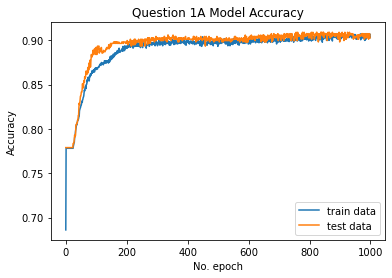

In [33]:
# Plot model accuracy against number of epochs
plt.title('Model Accuracy')
plt.xlabel('No. epoch')
plt.ylabel('Accuracy')
plt.plot(range(epochs),history.history['accuracy'])
plt.plot(range(epochs),history.history['val_accuracy'])
plt.legend(['train data', 'test data'], loc='lower right')

plt.savefig('Question1A_acc.png')

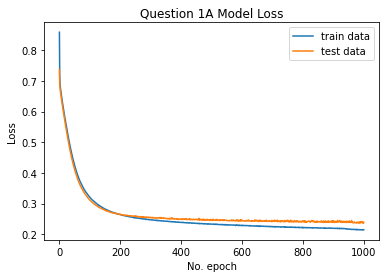

In [31]:
# Plot model loss against number of epochs
plt.title('Question 1A Model Loss')
plt.xlabel('No. epoch')
plt.ylabel('Loss')
plt.plot(range(epochs),history.history['loss'])
plt.plot(range(epochs),history.history['val_loss'])
plt.legend(['train data', 'test data'], loc='upper right')

plt.savefig('Question1A_loss.png')